# Medical Imaging
## 2021-2022

### Lab 5
João Félix Pimenta | Maja Milekic | Miguel Joaquim Roque Fernandes

Consider the study of a homogenous sample with T1/T2 = 600/60 ms, using a spin-echo 
NMR sequence, with TE/TR = 15/150 ms, and 90$^\circ$ excitation along +y. In the simulations, use 
the rotating reference frame and a time step of 0.5 ms, and assume instantaneous excitations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
T1 = 600
T2 = 60
TE = 15
TR = 150
deltat = 0.5
theta_e = 90*(np.pi/180)
theta_i = 180*(np.pi/180)

# Excitation
M0 = np.dot([[np.cos(theta_e), 0, -np.sin(theta_e)], [0, 1, 0], [np.sin(theta_e), 0, np.cos(theta_e)]], [0, 0, 1])

# Relaxation
def blochrelax(M_initial, duration, includelast=False):
    _M = [M_initial]
    time = np.arange(0, duration, deltat) #time elapsed in ms
    if not includelast: time = time[1:]
    for t in time:
        if t == TE/2:
            a = [[np.cos(theta_i), 0, -np.sin(theta_i)],
                 [0, 1, 0], 
                 [np.sin(theta_i), 0, np.cos(theta_i)]]
            _M.append(np.dot(a, _M[-1]))
        else:  
            a = [[np.exp(- deltat / T2), 0, 0],
                 [0, np.exp(- deltat / T2), 0],
                 [0, 0, np.exp(- deltat / T1)]]
            _M.append(np.add(np.dot(a, _M[-1]), [0, 0, 1 * (1 - np.exp(- deltat / T1))]))
    if includelast: _M = _M[1:]
    return _M

def offspin(M_initial, duration, deltaw, rep = 1, includelast=False):
    _M = [M_initial]
    time = np.arange(0, duration, deltat) #time elapsed in ms
    inv = TE*(np.arange(0,rep))+TE/2
    if not includelast: time = time[1:]
    for t in time:
        b = [[np.cos(deltaw*deltat/1000), np.sin(deltaw*deltat/1000), 0],
             [-np.sin(deltaw*deltat/1000), np.cos(deltaw*deltat/1000), 0], 
             [0,0,1]]
        if t in inv:
            a = [[np.cos(theta_i), 0, -np.sin(theta_i)],
                 [0, 1, 0], 
                 [np.sin(theta_i), 0, np.cos(theta_i)]]
            c = np.dot(b,a)
            _M.append(np.dot(c, _M[-1]))
        else:  
            a = [[np.exp(- deltat/T2), 0, 0],
                 [0, np.exp(- deltat/T2), 0],
                 [0, 0, np.exp(- deltat/T1)]]
            c = np.dot(b,a)
            _M.append(np.add(np.dot(c, _M[-1]), [0, 0, 1 * (1 - np.exp(- deltat/T1))]))
    if includelast: _M = _M[1:]
    return _M

# Plotting
def plotM(_M, duration=5, title="Magnetization along x, y and z axis and M magnitude"): # plot the values
    time = np.arange(0, duration, deltat) #time elapsed in ms
    fig, ax = plt.subplots()
    fig.suptitle(title)
    ax.plot(time, [row[0] for row in _M], "-r", label="Mx")
    ax.plot(time, [row[1] for row in _M], "-g", label="My")
    ax.plot(time, [row[2] for row in _M], "-b", label="Mz")
    plt.xlabel('Time (ms)')
    plt.ylabel('Magnetization')
    leg = ax.legend();
    plt.show()

First consider on-resonance spins (Δω = 0 Hz):

1. Simulate the evolution of the magnetization during one TR and plot each magnetization component as a function of time.

2. Compute the complex transverse magnetization, and plot its amplitude and phase as a function of time.

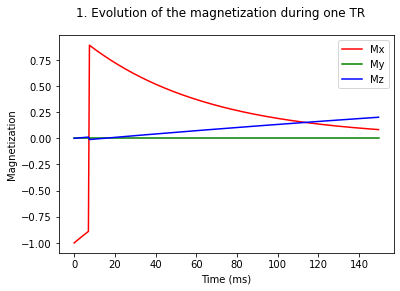

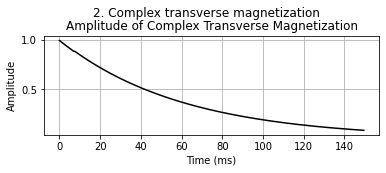

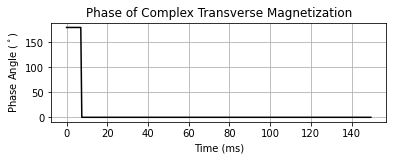

In [3]:
# 1.
M1 = blochrelax(M0, duration=TR)
plotM(M1, duration=TR, title='1. Evolution of the magnetization during one TR')

# 2. 
time = np.arange(0, TR, deltat)
Mx = [row[0] for row in M1]
Mx = np.array(Mx)
My = [row[1] for row in M1]
My = np.array(My)
Mxy = Mx + 1j*My
Mxy_amp = np.abs(Mxy)
Mxy_phase = np.angle(Mxy, deg =True)

plt.subplot(2,1,1)
plt.suptitle('2. Complex transverse magnetization')
plt.plot(time, Mxy_amp,'k')
plt.title('Amplitude of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(time, Mxy_phase,'k')
plt.title('Phase of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Phase Angle ($^\circ$)')
plt.grid()
plt.show()

Now consider an ensemble of off-resonance spins with Δω between -50 and +50 Hz, in steps of 1 Hz:

3. Repeat 1. and 2.; for the plots, consider the average magnetization of all spins.

4. Repeat 3. for a multiple spin-echo experiment with 6 echoes and determine the T2 of the sample using the data measured in this experiment

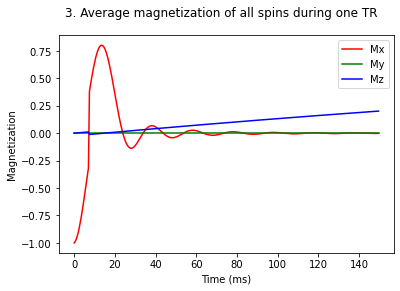

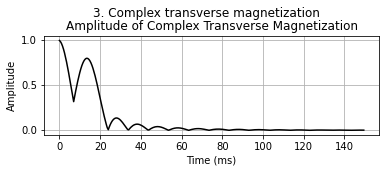

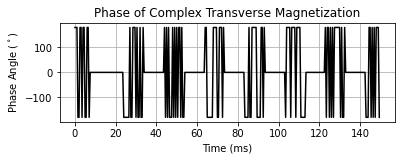

In [4]:
# 3.
w = np.arange(-50, 51, 1)*2*np.pi
time_dim = np.size(np.arange(0, TR, deltat)) 
M_sum = np.zeros([time_dim,3])

for deltaw in w:
    M = offspin(M0, TR, deltaw)
    M_sum = M_sum + M
    
M_sum = M_sum/np.size(w)
    
plotM(M_sum, duration=TR, title='3. Average magnetization of all spins during one TR')

time = np.arange(0, TR, deltat)
Mx = [row[0] for row in M_sum]
Mx = np.array(Mx)
My = [row[1] for row in M_sum]
My = np.array(My)
Mxy = Mx + 1j*My
Mxy_amp = np.abs(Mxy)
Mxy_phase = np.angle(Mxy, deg =True)

plt.subplot(2,1,1)
plt.suptitle('3. Complex transverse magnetization')
plt.plot(time, Mxy_amp,'k')
plt.title('Amplitude of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(time, Mxy_phase,'k')
plt.title('Phase of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Phase Angle ($^\circ$)')
plt.grid()
plt.show()

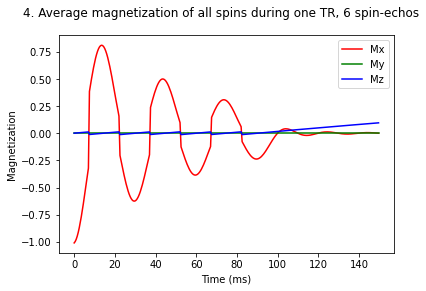

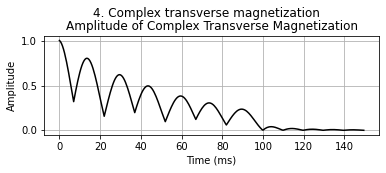

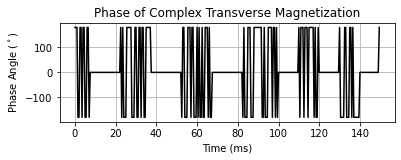

In [10]:
# 4.
w = np.arange(-50, 51, 1)*2*np.pi
time_dim = np.size(np.arange(0, TR, deltat)) 
M_sum = np.zeros([time_dim,3])

for deltaw in w:
    M = offspin(M0, TR, deltaw, 6)
    M_sum = M_sum + M
    
M_sum = M_sum/100
    
plotM(M_sum, duration=TR, title='4. Average magnetization of all spins during one TR, 6 spin-echos')

time = np.arange(0, TR, deltat)
Mx = [row[0] for row in M_sum]
Mx = np.array(Mx)
My = [row[1] for row in M_sum]
My = np.array(My)
Mxy = Mx + 1j*My
Mxy_amp = np.abs(Mxy)
Mxy_phase = np.angle(Mxy, deg =True)

plt.subplot(2,1,1)
plt.suptitle('4. Complex transverse magnetization')
plt.plot(time, Mxy_amp,'k')
plt.title('Amplitude of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(time, Mxy_phase,'k')
plt.title('Phase of Complex Transverse Magnetization')
plt.xlabel('Time (ms)')
plt.ylabel('Phase Angle ($^\circ$)')
plt.grid()
plt.show()

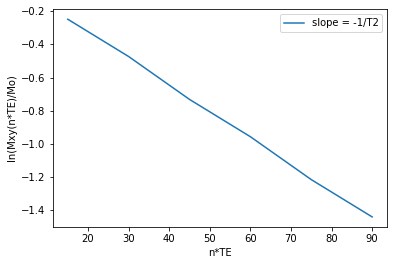

Estimated T2 in milliseconds = 
62.44180778649693


In [12]:
# T2 estimation - T2 = -(n*TE)/ln(Mxy (nTE)/Mo) with Mo=1
N = 6
n_array = np.arange(1,N+1)
amp_xy = np.zeros(N)

for n in n_array:
    ind = np.where(time==n*TE)
    amp_xy[n-1] = Mxy_amp[ind]   
    
x = np.multiply(n_array, TE)
y = np.log(amp_xy)

plt.plot(x, y, label='slope = -1/T2')
plt.xlabel('n*TE')
plt.ylabel('ln(Mxy(n*TE)/Mo)')
plt.legend()
plt.show()
coefficients = np.polyfit(x, y, 1)

# Now get the slope, which is the first coefficient in the array:
T2_e = -1/coefficients[0]
print("Estimated T2 in milliseconds = ")
print(T2_e)